In [1]:
import torch

!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-+.html
  Using cached torch_scatter-2.0.9.tar.gz (21 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp38-cp38-linux_x86_64.whl size=277749 sha256=a812c5da5f5ad9430945480691cd53f12c81b831de8383763245f006604cf11a
  Stored in directory: /home/mikael-vallenet/.cache/pip/wheels/7c/51/2a/409339f45a48bf748a5db76dfa11373ea7c883ecf1932eee2f
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-+.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 16.0 MB/s eta 0:00:0000:0100:01
  Created wheel for torch-sparse: filename=torch_sparse-0.6.15-cp38-cp38-linux_x86_64.whl size=490025 sha256=7c38430322605716dea99069c14331f1f5634a177b770fc2270e85e0c76012bf
  Stored in directory: /home/mikael-vallenet/.cache/pip/wheels/3c/4e/f2/

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
from torch_geometric.datasets import KarateClub

# Import dataset from PyTorch Geometric
dataset = KarateClub()

# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [8]:
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [9]:
data = dataset[0]

# Print x
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [10]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [11]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [12]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [13]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [14]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


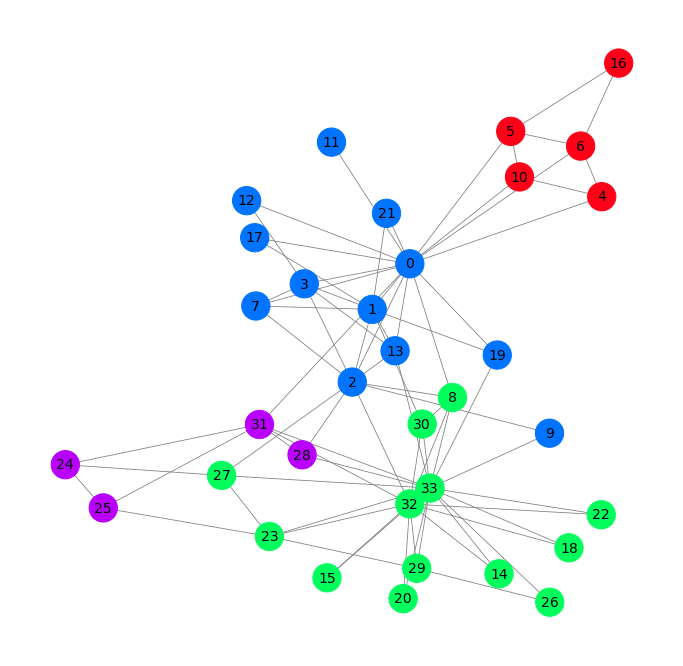

In [15]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [16]:
X = data.x.numpy().astype(int)

print(f'X = {X.shape}')
print(X)

X = (34, 34)
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [17]:
W = np.identity(X.shape[0], dtype=int)

print(f'W = {W.shape}')
print(W)

W = (34, 34)
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [18]:
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [19]:
A_tilde = A + np.identity(A.shape[0], dtype=int)

print(f'\nA_tilde = {A_tilde.shape}')
print(A_tilde)


A_tilde = (34, 34)
[[1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [20]:
H = A_tilde.T @ X @ W.T

print(f'H = A_tilde.T @ X @ W.T {H.shape}')
print(H)

H = A_tilde.T @ X @ W.T (34, 34)
[[1 1 1 ... 1 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [21]:
D = np.zeros(A.shape, dtype=int)
np.fill_diagonal(D, A.sum(axis=0))

print(f'D = {D.shape}')
print(D)

D_tilde = np.zeros(D.shape, dtype=int)
np.fill_diagonal(D_tilde, A_tilde.sum(axis=0))

print(f'\nD_tilde = {D_tilde.shape}')
print(D_tilde)

D = (34, 34)
[[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]

D_tilde = (34, 34)
[[17  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 18]]


In [22]:
D_inv = np.linalg.inv(D_tilde)
print(f'D_inv = {D_inv.shape}')
print(D_inv)

H = D_inv @ A_tilde.T @ X @ W.T
print(f'\nH = D_inv @ A.T @ X @ W.T {H.shape}')
print(H)

D_inv = (34, 34)
[[0.05882353 0.         0.         ... 0.         0.         0.        ]
 [0.         0.1        0.         ... 0.         0.         0.        ]
 [0.         0.         0.09090909 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14285714 0.         0.        ]
 [0.         0.         0.         ... 0.         0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.05555556]]

H = D_inv @ A.T @ X @ W.T (34, 34)
[[0.05882353 0.05882353 0.05882353 ... 0.05882353 0.         0.        ]
 [0.1        0.1        0.1        ... 0.         0.         0.        ]
 [0.09090909 0.09090909 0.09090909 ... 0.         0.09090909 0.        ]
 ...
 [0.14285714 0.         0.         ... 0.14285714 0.14285714 0.14285714]
 [0.         0.         0.07692308 ... 0.07692308 0.07692308 0.07692308]
 [0.         0.         0.         ... 0.05555556 0.05555556 0.05555556]]


In [23]:
D_inv12 = np.linalg.inv(D_tilde)
np.fill_diagonal(D_inv12, 1/ (D_tilde.diagonal()**0.5))

# New H
H = D_inv12 @ A_tilde.T @ D_inv12 @ X @ W.T
print(f'\nH = D_inv12 @ A.T @ D_inv12 @ X @ W.T {H.shape}')
print(H)


H = D_inv12 @ A.T @ D_inv12 @ X @ W.T (34, 34)
[[0.05882353 0.0766965  0.07312724 ... 0.09166985 0.         0.        ]
 [0.0766965  0.1        0.09534626 ... 0.         0.         0.        ]
 [0.07312724 0.09534626 0.09090909 ... 0.         0.0836242  0.        ]
 ...
 [0.09166985 0.         0.         ... 0.14285714 0.10482848 0.08908708]
 [0.         0.         0.0836242  ... 0.10482848 0.07692308 0.06537205]
 [0.         0.         0.         ... 0.08908708 0.06537205 0.05555556]]


In [26]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index)
        embedding = torch.relu(h)
        z = self.out(embedding)

        return h, embedding, z

model = GNN()
print(model)

GNN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [27]:
model = GNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []

# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, embedding, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = criterion(z, data.y)

    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store data for animations
    embeddings.append(embedding)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.40 | Acc: 14.71%
Epoch  10 | Loss: 1.20 | Acc: 58.82%
Epoch  20 | Loss: 0.99 | Acc: 64.71%
Epoch  30 | Loss: 0.74 | Acc: 73.53%
Epoch  40 | Loss: 0.52 | Acc: 82.35%
Epoch  50 | Loss: 0.35 | Acc: 88.24%
Epoch  60 | Loss: 0.23 | Acc: 88.24%
Epoch  70 | Loss: 0.17 | Acc: 100.00%
Epoch  80 | Loss: 0.11 | Acc: 100.00%
Epoch  90 | Loss: 0.07 | Acc: 100.00%
Epoch 100 | Loss: 0.05 | Acc: 100.00%
Epoch 110 | Loss: 0.04 | Acc: 100.00%
Epoch 120 | Loss: 0.03 | Acc: 100.00%
Epoch 130 | Loss: 0.02 | Acc: 100.00%
Epoch 140 | Loss: 0.02 | Acc: 100.00%
Epoch 150 | Loss: 0.02 | Acc: 100.00%
Epoch 160 | Loss: 0.01 | Acc: 100.00%
Epoch 170 | Loss: 0.01 | Acc: 100.00%
Epoch 180 | Loss: 0.01 | Acc: 100.00%
Epoch 190 | Loss: 0.01 | Acc: 100.00%
Epoch 200 | Loss: 0.01 | Acc: 100.00%


In [30]:
print(f'Final embeddings = {embedding.shape}')
print(embedding)

Final embeddings = torch.Size([34, 3])
tensor([[3.3010e+00, 2.1343e+00, 1.7500e+00],
        [2.2150e+00, 2.4279e+00, 2.2170e+00],
        [1.3777e+00, 1.8855e+00, 1.8571e+00],
        [2.0892e+00, 2.3706e+00, 1.7605e+00],
        [3.0116e+00, 0.0000e+00, 1.1612e-01],
        [3.1685e+00, 0.0000e+00, 0.0000e+00],
        [3.1989e+00, 0.0000e+00, 0.0000e+00],
        [1.8294e+00, 1.9364e+00, 1.4110e+00],
        [2.4405e-01, 1.6614e-01, 1.9161e+00],
        [1.5151e+00, 1.5055e+00, 1.4401e+00],
        [2.9849e+00, 1.0145e-04, 5.5231e-02],
        [1.9882e+00, 1.9117e+00, 1.5354e+00],
        [1.8688e+00, 1.8228e+00, 1.4325e+00],
        [1.5710e+00, 1.6507e+00, 1.5018e+00],
        [1.5196e-01, 1.5211e-04, 2.0101e+00],
        [6.4948e-02, 0.0000e+00, 1.8316e+00],
        [2.8573e+00, 0.0000e+00, 2.2644e-02],
        [1.9959e+00, 1.8227e+00, 1.4701e+00],
        [1.1723e-01, 0.0000e+00, 1.8654e+00],
        [1.6210e+00, 1.5814e+00, 1.4949e+00],
        [1.1126e-01, 0.0000e+00, 2.0090e+

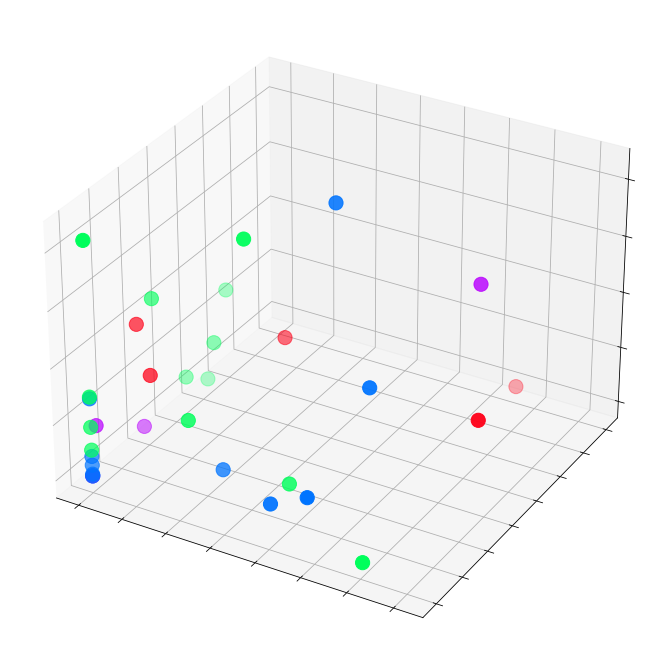

In [31]:
embed = embeddings[0].detach().cpu().numpy()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)

plt.show()